# MtARSI Dataloader
## import libraries

In [1]:
import math
import random

import cv2
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from tensorflow import keras

## Set DataGenerator class

In [14]:
class DataGenerator(keras.utils.Sequence):
    
    def __init__(self, 
                 batchSize, imgSize, foldIdx, csvPath, 
                 shuffle = True, mode = 'train'):
        
        self.df = pd.read_csv(csvPath)
        
        self.batch_size = batchSize
        self.img_size = imgSize
        self.fold_idx = foldIdx
        
        self.shuffle = shuffle
        self.mode = mode
        
        if self.mode == 'train':
            self.df = self.df[ self.df['fold_idx'] != self.fold_idx]
        elif self.mode == 'val':
            self.df = self.df[ self.df['fold_idx'] == self.fold_idx]
        
        self.on_epoch_end()
    
    def __len__(self):
        # Overriding len() function
            
        # Returns 'Iterations per epoch'
        # FYI_1. Batches and Batches... -> An epoch

        # FYI_2. if len(df) => 10 and batch_size = 2,
        # iterations per epoch => 5
        
        return math.ceil(len(self.df) / self.batch_size)
    
    def __getitem__(self, idx): # Batch iteration
        
        # if batch_size = 2, 
        # start = 0 * 2 = 0
        # end = 0 + 1 * 2 = 2
        # 0 -> 2
        start = idx * self.batch_size
        end = (idx + 1) * self.batch_size
        
        data = self.df.iloc[start:end]
        batch_x, batch_y = self.get_data(data)
        
        return np.array(batch_x), np.array(batch_y)
    
    def get_data(self, data): # Returns images read and labels
                
        batch_x = [] # For images
        
        batch_y = [] # For labels
        
        for _, row in data.iterrows():
            file_name = row['directories']
            
            # Read, convert BGR image -> RGB, resize, then normalise.
            image = cv2.imread(f'{file_name}')
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (self.img_size, self.img_size))
            image = image / 255.0
            
            label = int(row['labels'])
            
            batch_x.append(image)
            batch_y.append(label)
        
        return batch_x, batch_y
    
    def on_epoch_end(self):
        if self.shuffle:
            self.df = self.df.sample(frac = 1).reset_index(drop=True)

In [15]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [16]:
my_path = 'MyDrive/CNN/MTARSI/'
fullpath = '/content/drive/' + my_path

# use $ symbol to use variable as path
%cd $fullpath 

/content/drive/MyDrive/CNN/MTARSI


In [17]:
csv_path = 'dirs_kfolds.csv'
trainGenerator = DataGenerator(batchSize = 10, imgSize = 180, foldIdx = 1, csvPath = csv_path)

print("Length of trainGenerator:", len(trainGenerator))

Length of trainGenerator: 525


In [18]:
import os

def getClassNames(mainpath, getFullPath = True):
    
    # =========================# 
    def findAirplanetitle(directory): # Nested function to find the last backslash of a directory (Airplane type name).
        
        slashes = [] # Will contain indices of backslahses in a directory address
    
        for i in range(len(directory)): # Find every backslash indices in a directory address
            if directory[i] == '/':
                slashes.append(i)
        
        return max(slashes) # Returns largest index integer 
    # =========================# 
    
    planeList = [] # Will contain aircraft names
    fullpath = [] # Will contain full directory path
    
    folders = os.scandir(os.path.dirname(mainpath))
    
    for folder in folders:        
        backslash = findAirplanetitle(folder.path) # Find largest backslash index in a directory address
        title = folder.path[backslash + 1:]        
        planeList.append(title)
        
        if getFullPath:
            fullpath.append(folder.path)
    
    # Alphabetical order 
    planeList.sort()
    fullpath.sort()
    
    return planeList, fullpath
        
        
path = 'airplane-dataset-trans/'
class_names, fullpath = getClassNames(path)
print(class_names[0:10])
# fullpath[0:5]

['A-10_Thunderbolt', 'ATR-72_Airliner', 'ATR_72_ASW', 'Airliner', 'B-1_Lancer', 'B-29_Superfortress', 'B-2_Spirit', 'B-52_Stratofortress', 'B-57_Canberra', 'BusinessJet']


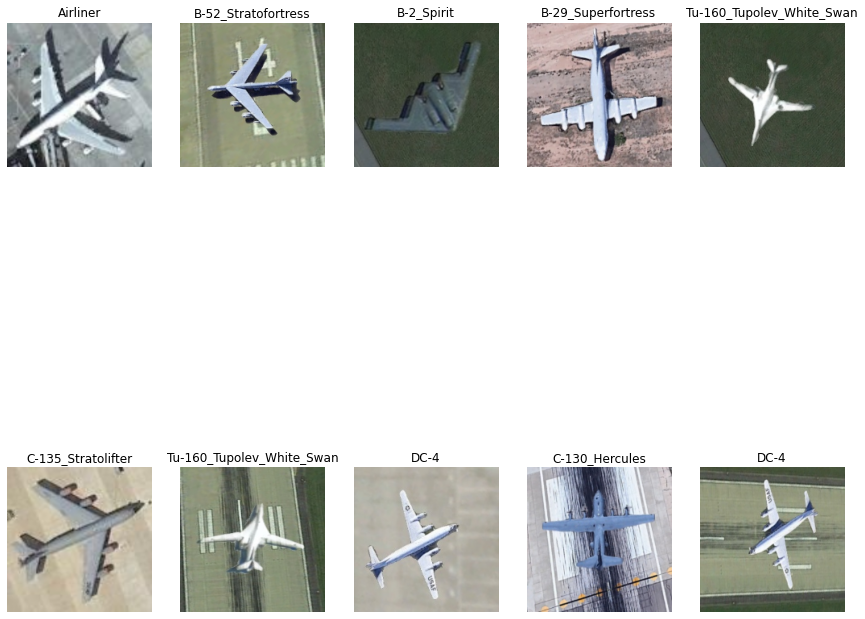

In [19]:
for batch in trainGenerator:
    X, y = batch
    
    plt.figure(figsize = (15, 15))
    
    for i in range(10):
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(X[i])
        plt.title(class_names[y[i]])
        # plt.title(fullpath[y[i]], fontsize = 7)
        plt.axis('off')
    
    break

In [ ]:
csv_path